#####予測モデルの訓練の流れ
1. データセットを訓練データとテストデータに分割
2. 説明変数の標準化
3. 予測モデルの指定
4. 損失関数の指定
5. 訓練データと損失関数を用いたモデルの訓練
6. テストデータを用いたモデルの評価
---
#####Flow of training a predictive model
1. split the dataset into training and test data
2. standardize explanatory variables
3. specify a predictive model
4. specify a loss function
5. train the model using the training data and the loss function
6. evaluate the model using the test data

目的
* 様々な環境要因や管理要因に基づく農業収量の予測
---
Objective
* Predicting agricultural yields based on various environmental and management factors

データセット/Dataset
* agricultural_yield_train.csv
* agricultural_yield_test.csv

データセットには、以下の特徴を持つ2万件のエントリーが含まれている：

* 土壌の品質： 50から100までの土壌品質指数
* 種子品種： 種子の品種を表すバイナリ指標。ここで1は高収量品種を表す
* 1ヘクタールあたりの肥料量（キログラム）: 肥料の使用量（ヘクタール当たりキログラム
* 晴れの日：生育期の晴天日数
* 降雨量 mm: 生育期に降った総雨量（ミリメートル）
* 灌漑スケジュール： 生育期間中の灌漑回数
* 収穫量 kg ヘクタール当たり: 1ヘクタール当たりのキログラム単位の農業収量で、予測の目的変数
---
The dataset contains 20,000 entries with the following features:

* Soil_Quality: Soil quality index, ranging from 50 to 100
* Seed_Variety: Binary indicator of seed variety, where 1 represents a high-yield variety
* Fertilizer_Amount_kg_per_hectare: The amount of fertilizer used in kilograms per hectare
* Sunny_Days: The number of sunny days during the growing season.
* Rainfall_mm: Total rainfall received during the growing season in millimeters.
* Irrigation_Schedule: The number of irrigations during the growing season.
* Yield_kg_per_hectare: The agricultural yield in kilograms per hectare, serving as the target variable for prediction.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[10,5]

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/9data/agricultural_yield_train.csv')
train.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,96.415657,1,147.853040,94.593926,444.267569,3,683.759119
1,92.352626,0,281.565396,90.504644,517.585491,7,678.714861
2,63.714785,1,137.864940,97.329340,420.310945,8,934.691975
3,90.084256,1,100.946659,113.404828,547.817646,7,905.842541
4,81.600341,1,223.088908,83.048176,434.726333,6,897.584665


In [ ]:
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/9data/agricultural_yield_test.csv')
test.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [ ]:
train.shape

(16000, 7)

In [ ]:
test.shape

(4000, 7)

In [ ]:
ytrain=train['Yield_kg_per_hectare']
xtrain=train.drop('Yield_kg_per_hectare',axis=1)

In [ ]:
ytest=test['Yield_kg_per_hectare']
xtest=test.drop('Yield_kg_per_hectare',axis=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
rf=RandomForestRegressor()
rf_model=rf.fit(xtrain,ytrain)
rf_model

RandomForestRegressor()

In [ ]:
ypred = rf_model.predict(xtest)
ypred

array([307.20516174, 870.23906129, 794.10978322, ..., 761.11281908,
       534.25419119, 314.40704767])

In [ ]:
r2_score(ytest,ypred)

0.9242150201629364

seaborn.kdeplot: https://seaborn.pydata.org/generated/seaborn.kdeplot.html

* カーネル密度推定プロット（KDE）を作成するにはkdeplot()を使用します。
* Use kdeplot() to create a kernel density estimation plot (KDE).

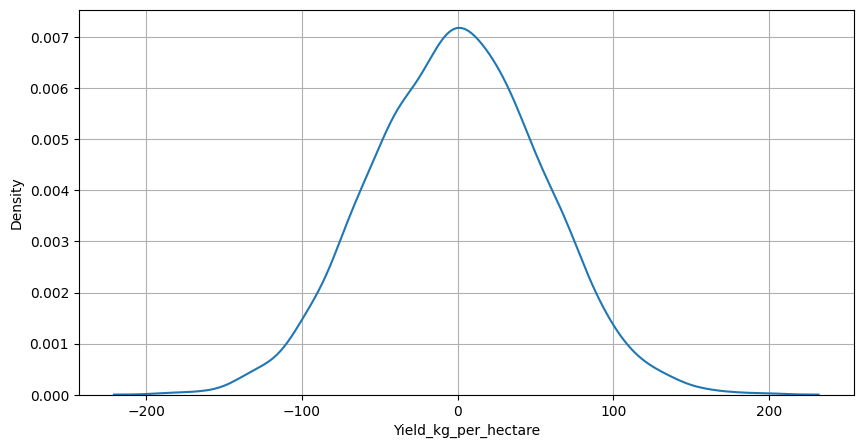

In [ ]:
sns.kdeplot(ytest-ypred)
plt.grid()
plt.show()

* 複数の特徴量を含むデータセットを分析する際、ランダムフォレストに代表される決定木ベースのアンサンブル分析器では、特徴量の重要度を算出することができます。
* feature_importances_ とは sklearn.ensemble.RandomForestClassifier、 sklearn.ensemble.RandomForestRegressorで特徴量の重要度を出力するメソッドです。
* feature_importances_を求め、棒グラフを作成します。
---
* When analyzing a data set containing multiple features, a decision tree-based ensemble analyzer, such as Random Forest, can calculate the importance of the features.
* feature_importances_ is a method that outputs the importance of features in sklearn.ensemble.RandomForestClassifier and sklearn.ensemble.RandomForestRegressor.
* Find feature_importances_ and create a bar graph.

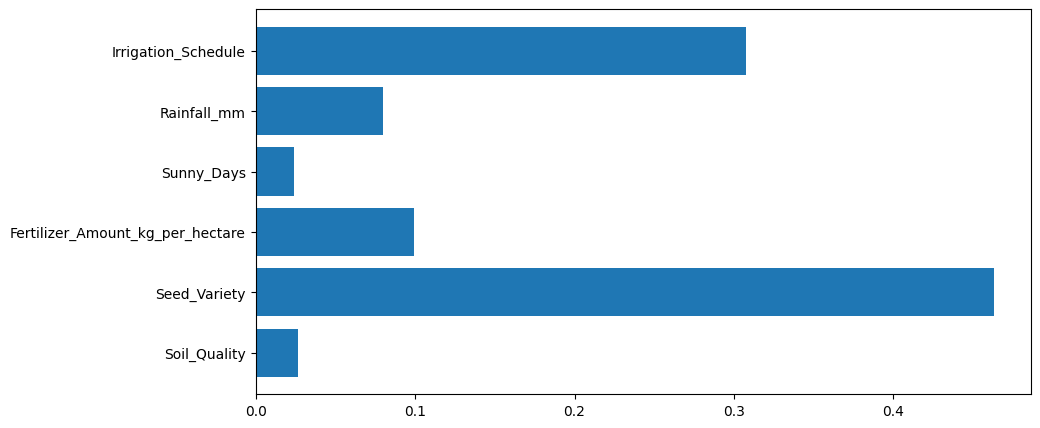

In [ ]:
plt.barh(xtrain.columns,rf_model.feature_importances_)
plt.show()